#SCS 3253 083 Machine Learning Group Project
###by Aliza Lakho, Stefen Harris, Francis Kim, James Park
###July 2024

Through the google dataset search, we found data from the PGA tour for the seasons 2018 to 2021.

https://zenodo.org/records/5235684

There are 14,000 instances and 64 features in the dataset.

The dataset was saved as AnalysisFile.csv in our shared Google Drive project folder.

In [ ]:
# read AnalysisFile.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_id = '1s57MKOxd5Mt2UJBoc7G3rko6atxZ73XW'
path = 'https://drive.google.com/uc?export=download&id='+ file_id
df = pd.read_csv(path)
print(df.head())

           player  Height cm  Weight lbs         DOB   Age  player id  \
0  Robert Allenby      185.0       180.0  12/07/1971  46.0        5.0   
1  Robert Allenby      185.0       180.0  12/07/1971  47.0        5.0   
2  Robert Allenby      185.0       180.0  12/07/1971  47.0        5.0   
3  Robert Allenby      185.0       180.0  12/07/1971  47.0        5.0   
4  Robert Allenby      185.0       180.0  12/07/1971  47.0        5.0   

         date                                 course  \
0  29/10/2017  Country Club of Jackson - Jackson, MS   
1  20/05/2018            Trinity Forest - Dallas, TX   
2  10/06/2018             TPC Southwind, Memphis, TN   
3  15/07/2018             TPC Deere Run - Silvis, IL   
4  23/07/2018        Keene Trace - Nicholasville, KY   

                tournament name  tournament id  ...  visibility  \
0  Sanderson Farms Championship         3763.0  ...        10.0   
1             AT&T Byron Nelson    401025251.0  ...         9.0   
2        FedEx St. Jude

In [ ]:
# list the features in the dataset

df.columns

Index(['player', 'Height cm', 'Weight lbs', 'DOB', 'Age', 'player id', 'date',
       'course', 'tournament name', 'tournament id', 'season',
       'final position', 'major', 'made_cut', 'Consecutive_Cuts_Made',
       'Finish', 'Score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g',
       'sg_total', 'sg_putt_prev', 'sg_arg_prev', 'sg_app_prev', 'sg_ott_prev',
       'sg_t2g_prev', 'sg_total_prev', 'place', 'Number of Rounds',
       'Drive Yards', 'Fairways Hit', 'PUTTS/HOLE', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise',
       'moonset', 'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'GreensGrass', 'FariwaysGrass', 'Water', 'Bunkers', 'Slope', 'Length',
       'Par'],
      dtype='object')

In [ ]:
# we will consider made_cut and Finish as target features

cs= df['made_cut'].value_counts()
print(cs)

cs = df['Finish'].value_counts()
print(cs)

# Based on the following results, I would give more importance to made_cut

made_cut
1.0    8176
0.0    5864
Name: count, dtype: int64
Finish
0.0     7393
23.0     148
17.0     146
2.0      140
43.0     136
        ... 
87.0       2
85.0       2
89.0       1
86.0       1
90.0       1
Name: count, Length: 90, dtype: int64


In [ ]:
# Now, I want to see what are the data types that i have and how to code them

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14041 entries, 0 to 14040
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player                 14040 non-null  object 
 1   Height cm              14040 non-null  float64
 2   Weight lbs             14040 non-null  float64
 3   DOB                    14040 non-null  object 
 4   Age                    14040 non-null  float64
 5   player id              14040 non-null  float64
 6   date                   14040 non-null  object 
 7   course                 14040 non-null  object 
 8   tournament name        14040 non-null  object 
 9   tournament id          14040 non-null  float64
 10  season                 14040 non-null  float64
 11  final position         14040 non-null  float64
 12  major                  14040 non-null  float64
 13  made_cut               14040 non-null  float64
 14  Consecutive_Cuts_Made  13721 non-null  float64
 15  Fi

In [ ]:
nominal = df[['player', 'player id', 'tournament id', 'GreensGrass', 'FariwaysGrass', 'Par', 'season']]
ordinal = df[['Height cm', 'Weight lbs', 'Age', 'Slope', 'Bunkers']]
continuous = df[['final position', 'Consecutive_Cuts_Made', 'Score',
              'sg_putt',	'sg_arg',	'sg_app',	'sg_ott',	'sg_t2g',	'sg_total',
              'sg_putt_prev',	'sg_arg_prev',	'sg_app_prev',	'sg_ott_prev',
              'sg_t2g_prev',	'sg_total_prev', 'place', 'Drive Yards', 'Fairways Hit',
              'PUTTS/HOLE', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
              'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
               'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
               'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'Length']]
binary_columns = df[['major', 'made_cut', 'Number of Rounds', 'Water']]

In [ ]:
df['made_cut'].value_counts()

,count
made_cut,
1.0,8176
0.0,5864


In [ ]:
8176/(8176+5864)

0.5823361823361823

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
nominal_encoded = ohe.fit_transform(nominal)

oe = OrdinalEncoder()
ordinal_encoded = oe.fit_transform(ordinal)

In [ ]:
from scipy.sparse import hstack


binary_encoded = binary_columns.values  # Convert to a NumPy array


combined_features = hstack((nominal_encoded, ordinal_encoded, continuous.values, binary_encoded))


combined_df = pd.DataFrame(combined_features.toarray())

nominal_columns = ohe.get_feature_names_out(nominal.columns)
ordinal_columns = oe.get_feature_names_out(ordinal.columns)
continuous_columns = continuous.columns
binary_columns = binary_columns.columns

all_columns = list(nominal_columns) + list(ordinal_columns) + list(continuous_columns) + list(binary_columns)
combined_df.columns = all_columns

print(combined_df.head())

   player_Aaron Baddeley  player_Aaron Wise  player_Abraham Ancer  \
0                    0.0                0.0                   0.0   
1                    0.0                0.0                   0.0   
2                    0.0                0.0                   0.0   
3                    0.0                0.0                   0.0   
4                    0.0                0.0                   0.0   

   player_Adam Hadwin  player_Adam Long  player_Adam Schenk  \
0                 0.0               0.0                 0.0   
1                 0.0               0.0                 0.0   
2                 0.0               0.0                 0.0   
3                 0.0               0.0                 0.0   
4                 0.0               0.0                 0.0   

   player_Adam Scott  player_Adam Svensson  player_Alex Cejka  \
0                0.0                   0.0                0.0   
1                0.0                   0.0                0.0   
2          

In [ ]:
df_combined = combined_df.copy()
df_combined = df_combined.dropna()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

y = df_combined['made_cut']
X = df_combined.drop('made_cut', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf_clf = RandomForestClassifier(random_state=42)
et_clf = ExtraTreesClassifier(random_state=42)

rf_clf.fit(X_scaled, y)
et_clf.fit(X_scaled, y)

rf_importances = rf_clf.feature_importances_
et_importances = et_clf.feature_importances_
all_feature_names = X.columns
feature_importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Random Forest Importance': rf_importances,
    'Extra Trees Importance': et_importances
})

print(feature_importances_df)


# Predictions
y_pred_rf = rf_clf.predict(X_scaled)
y_pred_et = et_clf.predict(X_scaled)

# Calculate metrics
accuracy_rf = accuracy_score(y, y_pred_rf)
f1_rf = f1_score(y, y_pred_rf)

accuracy_et = accuracy_score(y, y_pred_et)
f1_et = f1_score(y, y_pred_et)

print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - F1 Score:", f1_rf)

print("Extra Trees - Accuracy:", accuracy_et)
print("Extra Trees - F1 Score:", f1_et)

                   Feature  Random Forest Importance  Extra Trees Importance
0    player_Aaron Baddeley                  0.000035                0.000083
1        player_Aaron Wise                  0.000042                0.000078
2     player_Abraham Ancer                  0.000094                0.000092
3       player_Adam Hadwin                  0.000101                0.000200
4         player_Adam Long                  0.000045                0.000077
..                     ...                       ...                     ...
770          windspeedKmph                  0.001648                0.001108
771                 Length                  0.001750                0.001205
772                  major                  0.000280                0.000286
773       Number of Rounds                  0.260442                0.378338
774                  Water                  0.000196                0.000525

[775 rows x 3 columns]
Random Forest - Accuracy: 1.0
Random Forest - F1 Sco

In [ ]:
feature_importances_df.to_excel('feature_importance2222.xlsx', index=False)

In [ ]:
df['made_cut'].value_counts()

,count
made_cut,
1.0,8176
0.0,5864


In [ ]:
new_df = df.dropna()

In [ ]:
new_df['made_cut'].value_counts()

,count
made_cut,
1.0,5533
0.0,4286


In [ ]:
nominal = new_df[['GreensGrass', 'FariwaysGrass', 'Par', 'season']]
ordinal = new_df[['Height cm', 'Weight lbs', 'Age', 'Slope', 'Bunkers']]
continuous = new_df[['Consecutive_Cuts_Made',
              'sg_putt',	'sg_arg',	'sg_app',	'sg_ott',	'sg_t2g',	'sg_total', 'Drive Yards', 'Fairways Hit',
              'PUTTS/HOLE', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
              'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
               'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
               'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'Length']]
binary_columns = new_df[['major', 'made_cut', 'Water']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
nominal_encoded = ohe.fit_transform(nominal)

oe = OrdinalEncoder()
ordinal_encoded = oe.fit_transform(ordinal)

from scipy.sparse import hstack


binary_encoded = binary_columns.values  # Convert to a NumPy array


combined_features = hstack((nominal_encoded, ordinal_encoded, continuous.values, binary_encoded))


combined_df = pd.DataFrame(combined_features.toarray())


nominal_columns = ohe.get_feature_names_out(nominal.columns)
ordinal_columns = oe.get_feature_names_out(ordinal.columns)
continuous_columns = continuous.columns
binary_columns = binary_columns.columns

all_columns = list(nominal_columns) + list(ordinal_columns) + list(continuous_columns) + list(binary_columns)
combined_df.columns = all_columns

print(combined_df.head())

   GreensGrass_1.0  GreensGrass_2.0  GreensGrass_4.0  GreensGrass_5.0  \
0              0.0              1.0              0.0              0.0   
1              1.0              0.0              0.0              0.0   
2              1.0              0.0              0.0              0.0   
3              1.0              0.0              0.0              0.0   
4              1.0              0.0              0.0              0.0   

   FariwaysGrass_1.0  FariwaysGrass_2.0  FariwaysGrass_3.0  FariwaysGrass_5.0  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                1.0                0.0                0.0                0.0   
3                1.0                0.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   FariwaysGrass_6.0  FariwaysGrass_7.0  ...  precipMM  pressure  tempC  \

In [ ]:
df_combined = combined_df.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

y = df_combined['made_cut']
X = df_combined.drop('made_cut', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf_clf = RandomForestClassifier(random_state=42)
et_clf = ExtraTreesClassifier(random_state=42)

rf_clf.fit(X_scaled, y)
et_clf.fit(X_scaled, y)

rf_importances = rf_clf.feature_importances_
et_importances = et_clf.feature_importances_
all_feature_names = X.columns
feature_importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Random Forest Importance': rf_importances,
    'Extra Trees Importance': et_importances
})

print(feature_importances_df)


# Predictions
y_pred_rf = rf_clf.predict(X_scaled)
y_pred_et = et_clf.predict(X_scaled)

# Calculate metrics
accuracy_rf = accuracy_score(y, y_pred_rf)
f1_rf = f1_score(y, y_pred_rf)

accuracy_et = accuracy_score(y, y_pred_et)
f1_et = f1_score(y, y_pred_et)

print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - F1 Score:", f1_rf)

print("Extra Trees - Accuracy:", accuracy_et)
print("Extra Trees - F1 Score:", f1_et)

                  Feature  Random Forest Importance  Extra Trees Importance
0         GreensGrass_1.0                  0.001763                0.003330
1         GreensGrass_2.0                  0.001563                0.003260
2         GreensGrass_4.0                  0.001196                0.001882
3         GreensGrass_5.0                  0.000485                0.000810
4       FariwaysGrass_1.0                  0.001710                0.003235
5       FariwaysGrass_2.0                  0.001733                0.003360
6       FariwaysGrass_3.0                  0.000764                0.001425
7       FariwaysGrass_5.0                  0.001049                0.002087
8       FariwaysGrass_6.0                  0.000134                0.000267
9       FariwaysGrass_7.0                  0.000717                0.001137
10      FariwaysGrass_8.0                  0.002540                0.004003
11               Par_70.0                  0.001855                0.002981
12          

In [ ]:
feature_importances_df.to_excel('feature_importance_updated_29_07_24.xlsx', index=False)

In [ ]:
selected = [
    "sg_total",
    "sg_t2g",
    "sg_putt",
    "sg_app",
    "sg_ott",
    "sg_arg",
    #"Drive Yards",
    "Fairways Hit",
    #"Age",
    "PUTTS/HOLE",
    #"Weight lbs",
    #"Height cm",
    #"Consecutive_Cuts_Made",
    "Length",
    #"winddirDegree",
    #"moon_illumination",
    "Slope",
    "humidity",
    #"cloudcover",
    "pressure",
    #"WindGustKmph",
    #"DewPointC",
    #"FeelsLikeC",
    #"sunHour",
    #"WindChillC",
    #"windspeedKmph",
    "tempC",
    #"HeatIndexC",
    #"mintempC",
    #"maxtempC",
    "Bunkers",
    #"precipMM",
    #"uvIndex",
    #"visibility",
    'made_cut'
]

dataset = df_combined[selected]

In [ ]:
dataset.head()

,sg_total,sg_t2g,sg_putt,sg_app,sg_ott,sg_arg,Fairways Hit,PUTTS/HOLE,Length,Slope,humidity,pressure,tempC,Bunkers,made_cut
0,-2.07,-3.12,1.06,-1.07,-0.73,-1.32,65.6,1.84,7447.0,4.0,68.0,1015.0,29.0,3.0,1.0
1,-0.85,0.22,-1.07,0.71,-0.01,-0.48,65.6,1.84,7244.0,17.0,59.0,1013.0,33.0,6.0,0.0
2,-3.25,-1.47,-1.78,-0.77,-0.52,-0.18,65.6,1.84,7258.0,7.0,86.0,1013.0,30.0,5.0,0.0
3,-1.87,0.42,-2.30,1.13,-0.10,-0.61,65.6,1.84,7334.0,8.0,31.0,1014.0,31.0,2.0,0.0
4,-5.17,-2.83,-2.34,-2.23,-0.22,-0.38,60.7,1.77,7334.0,8.0,41.0,1017.0,33.0,2.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
X_train = train_df.drop('made_cut', axis=1)
y_train = train_df['made_cut']
X_test = test_df.drop('made_cut', axis=1)
y_test = test_df['made_cut']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train_scaled, y_train)

y_pred = rf_clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest - Accuracy:", accuracy)
print("Random Forest - F1 Score:", f1)

Random Forest - Accuracy: 0.8655804480651731
Random Forest - F1 Score: 0.879120879120879


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train_scaled, y_train)


y_pred_knn = knn_clf.predict(X_test_scaled)


accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("KNN - Accuracy:", accuracy_knn)
print("KNN - F1 Score:", f1_knn)

KNN - Accuracy: 0.8177189409368636
KNN - F1 Score: 0.8458225667527993


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)

svm_clf.fit(X_train_scaled, y_train)

y_pred_svm = svm_clf.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("SVM - Accuracy:", accuracy_svm)
print("SVM - F1 Score:", f1_svm)

SVM - Accuracy: 0.8559063136456212
SVM - F1 Score: 0.8718877320054322


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp_clf = MLPClassifier(random_state=42)

mlp_clf.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       824
         1.0       0.89      0.86      0.88      1140

    accuracy                           0.86      1964
   macro avg       0.85      0.86      0.86      1964
weighted avg       0.86      0.86      0.86      1964



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2)

_, accuracy = model.evaluate(X_test_scaled, y_test)

y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

Epoch 1/20
99/99 [==============================] - 2s 6ms/step - loss: 0.4727 - accuracy: 0.7856 - val_loss: 0.3693 - val_accuracy: 0.8434
Epoch 2/20
99/99 [==============================] - 0s 4ms/step - loss: 0.4040 - accuracy: 0.8229 - val_loss: 0.3637 - val_accuracy: 0.8434
Epoch 3/20
99/99 [==============================] - 0s 5ms/step - loss: 0.3986 - accuracy: 0.8265 - val_loss: 0.3658 - val_accuracy: 0.8460
Epoch 4/20
99/99 [==============================] - 0s 5ms/step - loss: 0.3942 - accuracy: 0.8347 - val_loss: 0.3545 - val_accuracy: 0.8466
Epoch 5/20
99/99 [==============================] - 0s 4ms/step - loss: 0.3844 - accuracy: 0.8350 - val_loss: 0.3576 - val_accuracy: 0.8479
Epoch 6/20
99/99 [==============================] - 0s 5ms/step - loss: 0.3821 - accuracy: 0.8300 - val_loss: 0.3502 - val_accuracy: 0.8415
Epoch 7/20
99/99 [==============================] - 0s 4ms/step - loss: 0.3716 - accuracy: 0.8380 - val_loss: 0.3583 - val_accuracy: 0.8485
Epoch 8/20
99/99 [==

That was the machine learning method of feature selection. Let's try using our business knowledge of golf stats and focus on the shots gained statistics. Those that start with 'sg'.

In [ ]:
# read the AnalysisFile.csv again

import pandas as pd

file_id = '1s57MKOxd5Mt2UJBoc7G3rko6atxZ73XW'
path = 'https://drive.google.com/uc?export=download&id='+ file_id
df = pd.read_csv(path)
print(df.head())

           player  Height cm  Weight lbs         DOB   Age  player id  \
0  Robert Allenby      185.0       180.0  12/07/1971  46.0        5.0   
1  Robert Allenby      185.0       180.0  12/07/1971  47.0        5.0   
2  Robert Allenby      185.0       180.0  12/07/1971  47.0        5.0   
3  Robert Allenby      185.0       180.0  12/07/1971  47.0        5.0   
4  Robert Allenby      185.0       180.0  12/07/1971  47.0        5.0   

         date                                 course  \
0  29/10/2017  Country Club of Jackson - Jackson, MS   
1  20/05/2018            Trinity Forest - Dallas, TX   
2  10/06/2018             TPC Southwind, Memphis, TN   
3  15/07/2018             TPC Deere Run - Silvis, IL   
4  23/07/2018        Keene Trace - Nicholasville, KY   

                tournament name  tournament id  ...  visibility  \
0  Sanderson Farms Championship         3763.0  ...        10.0   
1             AT&T Byron Nelson    401025251.0  ...         9.0   
2        FedEx St. Jude

In [ ]:
# target feature: made_cut
# explanatory features: Consecutive_Cuts_Made, sg_putt, sg_arg, sg_app, sg_ott, sg_t2g, sg_total

# sg_total = sg_t2g + sg_putt
# sg_t2g = sg_ott + sg_app + sg_arg

# sg_t2g is strokes gained tee to green
# sg_ott is strokes gained off the tee
# sg_app is strokes gained approach
# sg_arg is strokes gained around the green
# sg_putt is strokes gained putting

# in df, drop all columns that aren't 'made_cut',
# 'Consecutive_Cuts_Made', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g',
# 'sg_total'

# Create a list of columns to keep
columns_to_keep = ['made_cut', 'Consecutive_Cuts_Made', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']

# Select only those columns
df = df[columns_to_keep]

# Print the head of the new dataframe to check
print(df.head())

   made_cut  Consecutive_Cuts_Made  sg_putt  sg_arg  sg_app  sg_ott  sg_t2g  \
0       0.0                    NaN     0.17   -0.93    0.65   -0.30   -0.57   
1       1.0                    0.0     1.06   -1.32   -1.07   -0.73   -3.12   
2       0.0                    1.0    -1.07   -0.48    0.71   -0.01    0.22   
3       0.0                    0.0    -1.78   -0.18   -0.77   -0.52   -1.47   
4       0.0                    0.0    -2.30   -0.61    1.13   -0.10    0.42   

   sg_total  
0     -0.40  
1     -2.07  
2     -0.85  
3     -3.25  
4     -1.87  


In [ ]:
# inspect the data

print('made_cut value counts: \n\n', df['made_cut'].value_counts())

made_cut value counts: 

 made_cut
1.0    8176
0.0    5864
Name: count, dtype: int64


In [ ]:
print('# of NaN: ', df['Consecutive_Cuts_Made'].isna().sum())
print(df['Consecutive_Cuts_Made'].value_counts().sort_index())

# of NaN:  320
Consecutive_Cuts_Made
0.0     5730
1.0     2975
2.0     1696
3.0      997
4.0      654
5.0      464
6.0      305
7.0      215
8.0      164
9.0      123
10.0      88
11.0      73
12.0      55
13.0      43
14.0      34
15.0      23
16.0      18
17.0      14
18.0      11
19.0      11
20.0       8
21.0       8
22.0       3
23.0       2
24.0       1
25.0       1
26.0       1
27.0       1
28.0       1
29.0       1
30.0       1
Name: count, dtype: int64


In [ ]:
# my business knowledge suggests we can replace NaN in Consecutive_Cuts_Made with 0

df['Consecutive_Cuts_Made'] = df['Consecutive_Cuts_Made'].fillna(0)
print('# of NaN: ', df['Consecutive_Cuts_Made'].isna().sum())

# of NaN:  0


In [ ]:
print('# of NaN in sg_putt: ', df['sg_putt'].isna().sum())
print('# of NaN in sg_arg: ', df['sg_arg'].isna().sum())
print('# of NaN in sg_app: ', df['sg_app'].isna().sum())
print('# of NaN in sg_ott: ', df['sg_ott'].isna().sum())
print('# of NaN in sg_t2g: ', df['sg_t2g'].isna().sum())
print('# of NaN in sg_total: ', df['sg_total'].isna().sum())

# of NaN in sg_putt:  2385
# of NaN in sg_arg:  2385
# of NaN in sg_app:  2385
# of NaN in sg_ott:  2385
# of NaN in sg_t2g:  2385
# of NaN in sg_total:  2385


In [ ]:
# prompt: drop rows in columns sg_putt, sg_arg, sg_app, sg_ott, sg_t2g, sg_total that are NaN

# Drop rows with NaN in specified columns
df = df.dropna(subset=['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total'])

# Check if NaNs are removed
print('# of NaN in sg_putt: ', df['sg_putt'].isna().sum())
print('# of NaN in sg_arg: ', df['sg_arg'].isna().sum())
print('# of NaN in sg_app: ', df['sg_app'].isna().sum())
print('# of NaN in sg_ott: ', df['sg_ott'].isna().sum())
print('# of NaN in sg_t2g: ', df['sg_t2g'].isna().sum())
print('# of NaN in sg_total: ', df['sg_total'].isna().sum())

# of NaN in sg_putt:  0
# of NaN in sg_arg:  0
# of NaN in sg_app:  0
# of NaN in sg_ott:  0
# of NaN in sg_t2g:  0
# of NaN in sg_total:  0


In [ ]:
# prompt: give me descriptive stats on what remains in df

df.describe()

,made_cut,Consecutive_Cuts_Made,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
count,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000
mean,0.565202,1.769475,-0.116354,-0.034218,-0.086473,-0.039013,-0.159683,-0.275944
std,0.495752,2.814005,1.114750,0.718543,1.092826,0.798454,1.600503,1.957127
min,0.000000,0.000000,-5.660000,-4.260000,-6.980000,-5.730000,-9.130000,-10.950000
25%,0.000000,0.000000,-0.780000,-0.440000,-0.720000,-0.440000,-1.030000,-1.370000
50%,1.000000,1.000000,-0.030000,0.000000,0.010000,0.050000,0.010000,-0.140000
75%,1.000000,2.000000,0.630000,0.410000,0.630000,0.480000,0.910000,1.070000
max,1.000000,30.000000,3.980000,3.170000,4.140000,2.470000,5.570000,5.960000


In [ ]:
# train a stochastic gradient descent classifier using Scikit-Learn's SGDClassifier class. Y is made_cut and X is Consecutive_Cuts_Made, sg_putt, sg_arg, sg_app, sg_ott, sg_t2g, sg_total

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = df[['Consecutive_Cuts_Made', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']]
y = df['made_cut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDClassifier
clf = SGDClassifier(loss='log_loss', random_state=42)  # Using log_loss for logistic regression

# Train the classifier
clf.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [ ]:
# Use the cross_val_score() function to evaluate our SGDClassifier model using 5-fold cross-validation.

from sklearn.model_selection import cross_val_score

# Evaluate the model using 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.79459691 0.78592879 0.8018018  0.77091377 0.7962248 ]
Average cross-validation score: 0.7898932134781191


In [ ]:
# Try just Consecutive_Cuts_Made

# Define your features and target variable
X = df[['Consecutive_Cuts_Made']]  # Selecting only 'Consecutive_Cuts_Made' as feature
y = df['made_cut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDClassifier
clf = SGDClassifier(loss='log_loss', random_state=42)  # Using log_loss for logistic regression

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the model using 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.5651801  0.56499356 0.56070356 0.57314457 0.56542257]
Average cross-validation score: 0.5658888734360433


Consecutive_Cuts_Made is not a good explanatory feature on its own

In [ ]:
# Try sg_total
# reminder:
# sg_total = sg_t2g and sg_putt
# sg_t2g = sg_ott + sg_app + sg_arg

# Define your features and target variable
X = df[['sg_total']]  # Selecting only 'sg_total' as feature
y = df['made_cut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDClassifier
clf = SGDClassifier(loss='log_loss', random_state=42)  # Using log_loss for logistic regression

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the model using 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.7941681  0.82453882 0.7992278  0.8000858  0.80694981]
Average cross-validation score: 0.8049940653714239


In [ ]:
# does breaking up sg_total into sg_t2g and sg_putt improve it?

# Define your features and target variable
X = df[['sg_putt', 'sg_t2g']]  # Selecting 'sg_putt' and 'sg_t2g' as features
y = df['made_cut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDClassifier
clf = SGDClassifier(loss='log_loss', random_state=42)  # Using log_loss for logistic regression

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the model using 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.79845626 0.7983698  0.78721579 0.8009438  0.82582583]
Average cross-validation score: 0.8021622946151249


In [ ]:
# How about if we further break down sg_t2g into its components?

# Define your features and target variable
X = df[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott']]
y = df['made_cut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDClassifier
clf = SGDClassifier(loss='log_loss', random_state=42)  # Using log_loss for logistic regression

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the model using 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.79802744 0.82153582 0.79322179 0.80780781 0.81767482]
Average cross-validation score: 0.8076535368988198


In [ ]:
# prompt: what is f1 of above?

from sklearn.metrics import f1_score

# Assuming 'clf' is your trained SGDClassifier and 'X_test' and 'y_test' are your test data
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("F1-score:", f1)


F1-score: 0.8177744585511576


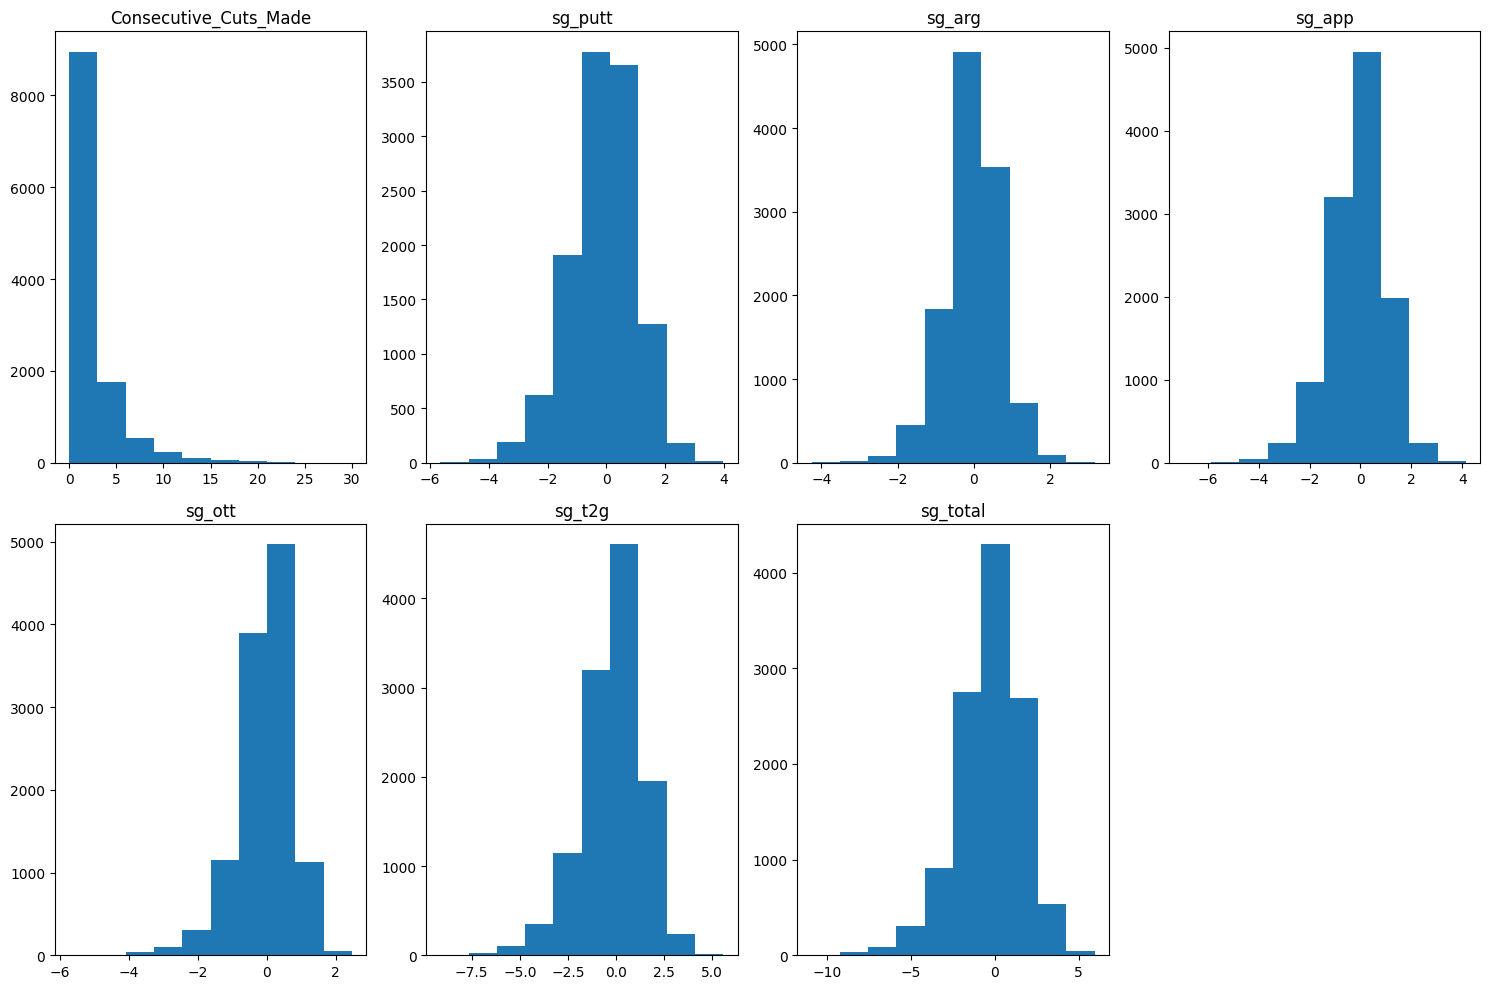

In [ ]:
# maybe we need to do feature scaling

# prompt: use pyplot to plot a histogram of 'Consecutive_Cuts_Made', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total'

import matplotlib.pyplot as plt

# Create histograms for the specified columns
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.hist(df['Consecutive_Cuts_Made'])
plt.title('Consecutive_Cuts_Made')

plt.subplot(2, 4, 2)
plt.hist(df['sg_putt'])
plt.title('sg_putt')

plt.subplot(2, 4, 3)
plt.hist(df['sg_arg'])
plt.title('sg_arg')

plt.subplot(2, 4, 4)
plt.hist(df['sg_app'])
plt.title('sg_app')

plt.subplot(2, 4, 5)
plt.hist(df['sg_ott'])
plt.title('sg_ott')

plt.subplot(2, 4, 6)
plt.hist(df['sg_t2g'])
plt.title('sg_t2g')

plt.subplot(2, 4, 7)
plt.hist(df['sg_total'])
plt.title('sg_total')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: use StandardScalar to scale 'Consecutive_Cuts_Made'

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 'Consecutive_Cuts_Made' column and transform it
df['Consecutive_Cuts_Made_Scaled'] = scaler.fit_transform(df[['Consecutive_Cuts_Made']])

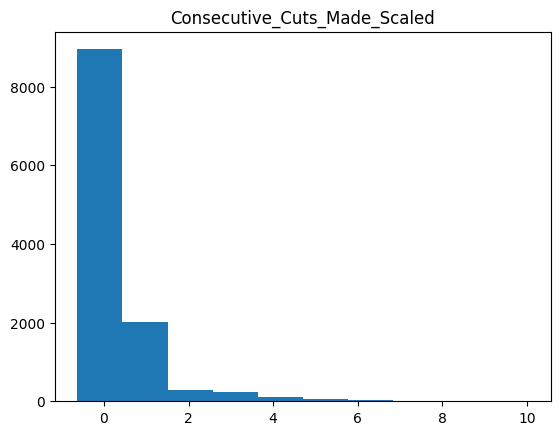

In [ ]:
# prompt: plot a histogram of 'Consecutive_Cuts_Made_Scaled'

# Plot the histogram of the scaled column
plt.hist(df['Consecutive_Cuts_Made_Scaled'])
plt.title('Consecutive_Cuts_Made_Scaled')
plt.show()

In [ ]:
# Train an SGD classifier where Y=made_cut and X=Consecutive_Cuts_Made_Scaled

# Define your features and target variable
X = df[['Consecutive_Cuts_Made_Scaled']]
y = df['made_cut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDClassifier
clf = SGDClassifier(loss='log_loss', random_state=42)  # Using log_loss for logistic regression

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the model using 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.5651801  0.58773059 0.56070356 0.56542257 0.58129558]
Average cross-validation score: 0.5720664796136494


Consecutive_Cuts_Made_Scaled avg cross-validation score 0.572 barely better than Consecutive_Cuts_Made avg cross-validation score 0.566

In [ ]:
# Train a stochastic gradient descent classifier using Scikit-Learn's SGDClassifier class. Y is made_cut and X is Consecutive_Cuts_Made_Scaled, sg_putt, sg_arg, sg_app, sg_ott. Then evaluate our SGDClassifier model using 5-fold cross-validation.

# Define your features and target variable
X = df[['Consecutive_Cuts_Made_Scaled', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott']]
y = df['made_cut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SGDClassifier
clf = SGDClassifier(loss='log_loss', random_state=42)  # Using log_loss for logistic regression

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the model using 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.79631218 0.81896182 0.7957958  0.81166881 0.82496782]
Average cross-validation score: 0.8095412859563803


In [ ]:
# use randomforestregressor to indicate the relative importance of each of Consecutive_Cuts_Made_Scaled, sg_putt, sg_arg, sg_app, sg_ott

from sklearn.ensemble import RandomForestRegressor

# Define your features and target variable
X = df[['Consecutive_Cuts_Made_Scaled', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott']]
y = df['made_cut']

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
  print(f"{feature}: {importance}")

KeyError: "['Consecutive_Cuts_Made_Scaled'] not in index"

In [ ]:
# use randomforestregressor to indicate the relative importance of each of sg_putt, sg_arg, sg_app, sg_ott

# Define your features and target variable
X = df[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott']]
y = df['made_cut']

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
  print(f"{feature}: {importance}")

sg_putt: 0.3039356786241116
sg_arg: 0.20145547785642004
sg_app: 0.29512638798480645
sg_ott: 0.199482455534662


In [ ]:
# prompt: use StandardScalar to scale 'sg_total'

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 'sg_total' column and transform it
df['sg_total_scaled'] = scaler.fit_transform(df[['sg_total']])
df['sg_putt_scaled'] = scaler.fit_transform(df[['sg_putt']])

In [ ]:
# Compare sg_total vs scaled
# Define your features and target variable
#X = df[[ 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']]
X = df[[ 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total_scaled']]
y = df['made_cut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SGDClassifier
clf = SGDClassifier(loss='log_loss', random_state=42)  # Using log_loss for logistic regression

# Train the classifier
clf.fit(X_train, y_train)

# Evaluate the model using 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

#sg_total
#Cross-validation scores: [0.80531732 0.82024882 0.81939082 0.81939082 0.79236379]
#Average cross-validation score: 0.8113423151159
#scaled
#Cross-validation scores: [0.79716981 0.81981982 0.81552982 0.81853282 0.81896182]
#Average cross-validation score: 0.8140028168330055

Cross-validation scores: [0.79716981 0.81981982 0.81552982 0.81853282 0.81896182]
Average cross-validation score: 0.8140028168330055


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Assuming 'df' is your DataFrame

# Compare sg_total vs scaled
# Define your features and target variable
# X = df[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']]
X = df[['sg_putt_scaled', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total_scaled']]
y = df['made_cut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='sigmoid', gamma=0.001, coef0=0.3)  # You can experiment with different kernels

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#linear Accuracy: 0.7980274442538593
#rbf Accuracy: 0.8156089193825042
#poly deg 3 Accuracy: 0.7632933104631218
#poly deg 2 Accuracy: 0.7993138936535163
#poly4 Accuracy: 0.7474271012006861
#poly5 Accuracy: 0.7264150943396226
#sigmoid gamma=0.01, coef0=0.1 Accuracy: 0.7950257289879932
#sigmoid gamma=0.1, coef0=0.1 Accuracy: 0.7221269296740995
#sigmoid gamma=0.001, coef0=0.1 Accuracy: 0.7958833619210978
#sigmoid gamma=0.001, coef0=0.5 Accuracy: 0.7933104631217839
#sigmoid gamma=0.001, coef0=0.5 Accuracy: 0.7954545454545454

Accuracy: 0.7911663807890223


In [ ]:
# prompt: What is F1 of above?

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


F1-score: 0.8194289951798296


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame

# Compare sg_total vs scaled- Its much better not scaled
# Define your features and target variable
# X = df[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']]
X = df[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']]
y = df['made_cut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', gamma=0.1, coef0=0)  # You can experiment with different kernels

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#rbf Accuracy: 0.8227051758650271
#neural net Accuracy: 0.8227051496505737

Accuracy: 0.8227051758650271


In [ ]:

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.8369279326670174


In [ ]:
# prompt: Train a neural net.

import tensorflow as tf
from tensorflow import keras

# Define your features and target variable
X = df[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']]
y = df['made_cut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='LeakyReLU', input_shape=(6,)),  # Input layer with 4 features
    #keras.layers.Dropout(0.2),  # Add dropout
    keras.layers.Dense(64, activation='LeakyReLU'),  # Hidden layer
    #keras.layers.Dropout(0.2),  # Add dropout
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Consider using early stopping
#early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))
#rbf Accuracy: 0.8227051758650271
#neural net Accuracy relu adam: 0.8227051496505737
#NN with tanh tanh sigmoid Accuracy: 0.824992835521698
# elu wasnt as good
# all 3 tanh was not good, dropout didnt help
# LeakyRelu with sigmoid Accuracy: 0.8255647420883179
# softmax was terrible
#no change from adam to RMSprop, sgd no good, adagrad, adamax no good, hinge no good
#nadam was best Accuracy: 0.8269945383071899
#another nadam Accuracy: 0.8224192261695862
#another rmsprop Accuracy: 0.8267086148262024

Epoch 1/10
255/255 [==============================] - 6s 8ms/step - loss: 0.4234 - accuracy: 0.8174
Epoch 2/10
255/255 [==============================] - 2s 7ms/step - loss: 0.3914 - accuracy: 0.8290
Epoch 3/10
255/255 [==============================] - 1s 5ms/step - loss: 0.3824 - accuracy: 0.8282
Epoch 4/10
255/255 [==============================] - 1s 5ms/step - loss: 0.3778 - accuracy: 0.8295
Epoch 5/10
255/255 [==============================] - 1s 4ms/step - loss: 0.3746 - accuracy: 0.8310
Epoch 6/10
255/255 [==============================] - 1s 3ms/step - loss: 0.3725 - accuracy: 0.8310
Epoch 7/10
255/255 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8317
Epoch 8/10
255/255 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8347
Epoch 9/10
255/255 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8323
Epoch 10/10
110/110 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8293

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.8369279326670174
